In [1]:

# print("animal video")
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from skimage.morphology import medial_axis, skeletonize
#from timeit import default_timer as timer
print("package loaded")


package loaded


## Load Images

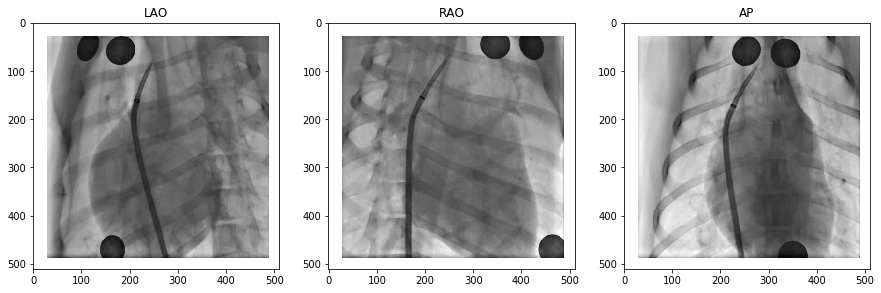

In [2]:
a=30
b=30
c=490
d=490
img1=cv2.imread('animalvideocaptures/m0012_frame0.jpg', cv2.IMREAD_GRAYSCALE)
h,w=img1.shape
img1cr=img1[a:c,b:d]
top, bottom, left, right = [a-1, h-c, b-1, w-d]
img1 = cv2.copyMakeBorder(img1cr, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)

img2=cv2.imread('animalvideocaptures/m0014_frame0.jpg', cv2.IMREAD_GRAYSCALE)
h,w=img2.shape
img2cr=img2[a:c,b:d]
top, bottom, left, right = [a-1, h-c, b-1, w-d]
img2 = cv2.copyMakeBorder(img2cr, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)

img3=cv2.imread('animalvideocaptures/AP_frame45.jpg', cv2.IMREAD_GRAYSCALE)  #45
h,w=img3.shape
img3cr=img3[a:c,b:d]
top, bottom, left, right = [a-1, h-c, b-1, w-d]
img3 = cv2.copyMakeBorder(img3cr, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)
#cv2.imshow('LAO',img1)
#cv2.imshow('RAO',img2)
#cv2.imshow('AP',img3)
#cv2.waitKey(0)
plt.rcParams['figure.figsize'] = [15, 7]
plt.subplot(131),plt.imshow(img1,'gray'), plt.title('LAO')
plt.subplot(132),plt.imshow(img2,'gray'), plt.title('RAO')
plt.subplot(133),plt.imshow(img3,'gray'), plt.title('AP')
plt.show()


## Basic processing

In [3]:
img1inv=cv2.bitwise_not(img1)
img2inv=cv2.bitwise_not(img2)
img3inv=cv2.bitwise_not(img3)

img1iblur= cv2.medianBlur(img1inv,5) 
img2iblur= cv2.medianBlur(img2inv,5)
img3iblur= cv2.medianBlur(img3inv,5)

img1_filled=img1iblur.copy()
img2_filled=img2iblur.copy()
img3_filled=img3iblur.copy()

img1_bgr =cv2.cvtColor(img1inv, cv2.COLOR_GRAY2BGR)
img2_bgr =cv2.cvtColor(img2inv, cv2.COLOR_GRAY2BGR)
img3_bgr =cv2.cvtColor(img3inv, cv2.COLOR_GRAY2BGR)

img1_overlay = img1_bgr.copy()
img2_overlay = img2_bgr.copy()
img3_overlay = img3_bgr.copy()

## Marker detection

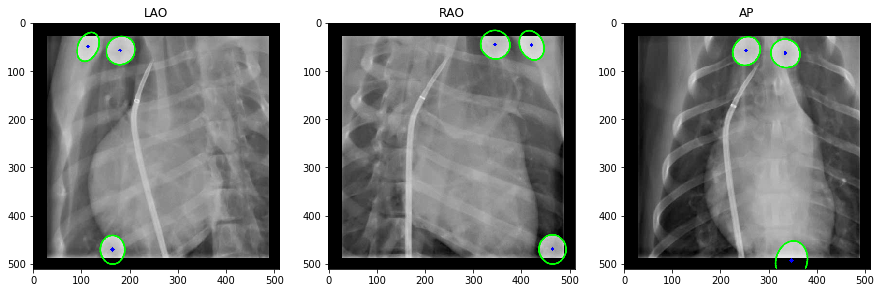

In [4]:
markerposLAO =np.zeros(shape=(3,2), dtype=int)
aa=0
ret,thresh = cv2.threshold(img1iblur,170,255,0)
thadap = cv2.adaptiveThreshold(img1iblur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
_, contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i, c in enumerate(contours):
    area= cv2.contourArea(c)
    if area<1000:
        continue
    if area>3000:
        continue
    cv2.drawContours(img1_filled, contours, i, 120, 4)
    ellipse = cv2.fitEllipse(c)
    x,y =int(ellipse[0][0]), int(ellipse[0][1])
    cv2.ellipse(img1_overlay, ellipse, (0,255,0), 2,cv2.LINE_AA)
    cv2.circle(img1_overlay,(x,y),2,(0,0,255),3)
    markerposLAO[aa,:]  = (x,y)
    aa +=1

    # cv2.drawContours(img1_filled,[c],0,140,-1)
# cv2.imshow('Markers in LAO', img1_overlay)
# cv2.imshow('thresh1', thresh)
# cv2.imshow('Markers removal-LAO',img1_filled)
# cv2.imwrite('Markers1.png',img1_overlay)
# print(ellipse.shape)

markerposRAO =np.zeros(shape=(3,2), dtype=int)
bb=0
ret,thresh = cv2.threshold(img2iblur,170,255,0)
thadap = cv2.adaptiveThreshold(img2iblur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
_, contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i, c in enumerate(contours):
    area= cv2.contourArea(c)
    if area<900:
        continue
    if area>3500:
        continue
    # cv2.drawContours(img1_bgr, contours, i, (0,255,0), 2)
    ellipse = cv2.fitEllipse(c)
    x,y =int(ellipse[0][0]), int(ellipse[0][1])
    # (x,y),(MA,ma),angle = cv2.fitEllipse(c)
    cv2.ellipse(img2_overlay, ellipse, (0,255,0), 2,cv2.LINE_AA)
    cv2.circle(img2_overlay,(x,y),2,(0,0,255),3)
    markerposRAO[bb,:] = (x,y)
    bb +=1
    #cv2.drawContours(img2_filled,[c],0,0,-1)
# cv2.imshow('Markers in RAO', img2_overlay)
# cv2.imshow('thresh2',thresh)
# cv2.imshow('Markers removal-RAO',img2_filled)
# cv2.imwrite('Markers2.png',img2_overlay)

markerposAP =np.zeros(shape=(3,2), dtype=int)
cc=0
ret,thresh = cv2.threshold(img3iblur,190,255,0)
thadap = cv2.adaptiveThreshold(img3iblur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
_, contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i, c in enumerate(contours):
    area= cv2.contourArea(c)
    if area<1000:
        continue
    if area>3500:
        continue
    cv2.drawContours(img3_filled, contours, i, 120, 4)
    ellipse = cv2.fitEllipse(c)
    x,y =int(ellipse[0][0]), int(ellipse[0][1])
    cv2.ellipse(img3_overlay, ellipse, (0,255,0), 2,cv2.LINE_AA)
    cv2.circle(img3_overlay,(x,y),2,(0,0,255),3)
    markerposAP[cc,:] = (x,y)
    cc +=1
 
    # cv2.drawContours(img1_filled,[c],0,140,-1)
# cv2.imshow('Markers in AP', img3_overlay)
# cv2.imshow('thresh3', thresh)
# cv2.imshow('Markers removal-AP',img3_filled)
# cv2.waitKey(0)
# cv2.imwrite('Markers3.png',img3_overlay)

plt.subplot(131),plt.imshow(img1_overlay,'gray'), plt.title('LAO')
plt.subplot(132),plt.imshow(img2_overlay,'gray'), plt.title('RAO')
plt.subplot(133),plt.imshow(img3_overlay,'gray'), plt.title('AP')
plt.show()

## Catheter detection

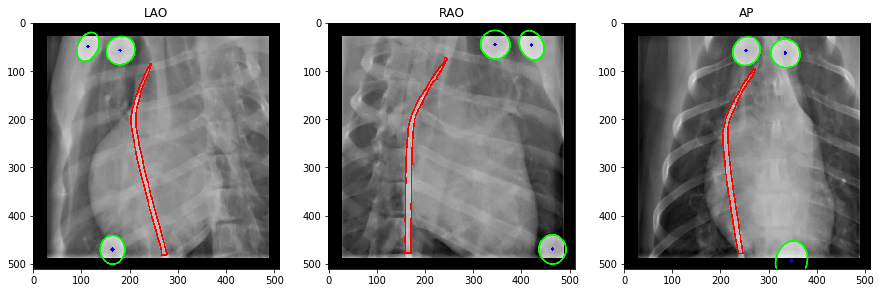

In [5]:
edges1=cv2.Canny(img1iblur, 50, 150)
edges2=cv2.Canny(img2iblur, 40, 170)
edges3=cv2.Canny(img3iblur, 90, 250)

#LAO
_, contours,hierarchy = cv2.findContours(edges1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = [] 
for contour in contours:
    rect = cv2.minAreaRect(contour)       #I have used min Area rect for better result
    width = rect[1][0]
    height = rect[1][1]
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)  #>8 is circular
    area = cv2.contourArea(contour)
    if ((len(approx) > 1) & (len(approx) < 7) & (area > 1) ) and (width<600) and (height <1000) and (width >= 1) and (height > 1):
        contour_list.append(contour)

h, w = edges1.shape[:2]
mask0 = np.zeros((h, w), np.uint8)
cath1edge=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 2)
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 7))
# cv2.imwrite('cath1edge.png',cath1edge)
cath1=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 17)
eroded1 = cv2.erode(cath1.copy(),element, iterations=5)
edgesnew1=cv2.Canny(eroded1, 50, 150)
_, contours,hierarchy = cv2.findContours(edgesnew1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img1_overlay, contours,  -1, (255,0,0), 2)

#RAO
_, contours,hierarchy = cv2.findContours(edges2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []

for contour in contours:
    rect = cv2.minAreaRect(contour)       #I have used min Area rect for better result
    width = rect[1][0]
    height = rect[1][1]
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)  #>8 is circular
    area = cv2.contourArea(contour)
    if  ((len(approx) > 1) & (len(approx) < 10) & (area > 50) ) and (width<500) and (height <1000) and (width >= 2) and (height > 2):
        contour_list.append(contour)

h, w = edges2.shape[:2]
mask0 = np.zeros((h, w), np.uint8)
cath2edge=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 2)
# cv2.imwrite('cath2edge.png',cath2edge)

cath2=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 17)
eroded2 = cv2.erode(cath2.copy(),element, iterations=5)
edgesnew2=cv2.Canny(eroded2, 50, 150)
_, contours,hierarchy = cv2.findContours(edgesnew2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2_overlay, contours,  -1, (255,0,0), 2)

#AP
_, contours,hierarchy = cv2.findContours(edges3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []
for contour in contours:
    rect = cv2.minAreaRect(contour)       #I have used min Area rect for better result
    width = rect[1][0]
    height = rect[1][1]
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)  #>8 is circular
    area = cv2.contourArea(contour)
    if  ((len(approx) > 1) & (len(approx) < 10) & (area > 33) ) and (width<500) and (height <1000) and (width >= 2) and (height > 2):
        contour_list.append(contour)

h, w = edges3.shape[:2]
mask0 = np.zeros((h, w), np.uint8)
cath3edge=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 2)
# cv2.imwrite('cath3edge.png',cath3edge)
cath3=cv2.drawContours(mask0.copy(),  contour_list,  -1, 255, 17)
eroded3 = cv2.erode(cath3.copy(),element, iterations=5) # this can remove any single-lined edges
edgesnew3=cv2.Canny(eroded3, 50, 150)
_, contours,hierarchy = cv2.findContours(edgesnew3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img3_overlay, contours,  -1, (255,0,0), 2)

plt.subplot(131),plt.imshow(img1_overlay,'gray'), plt.title('LAO')
plt.subplot(132),plt.imshow(img2_overlay,'gray'), plt.title('RAO')
plt.subplot(133),plt.imshow(img3_overlay,'gray'), plt.title('AP')
plt.show()

## Skeletonization

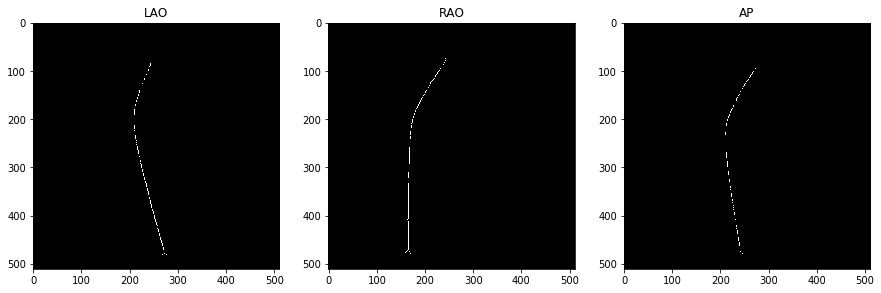

In [6]:
size = np.size(eroded1)
skel1 = np.zeros(eroded1.shape,np.uint8)
ret,img = cv2.threshold(eroded1,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel1 = cv2.bitwise_or(skel1,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

# cv2.imshow("skel1",skel1)

size = np.size(eroded2)
skel2 = np.zeros(eroded2.shape,np.uint8)
ret,img = cv2.threshold(eroded2,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel2 = cv2.bitwise_or(skel2,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img) 
    if zeros==size:
        done = True

# cv2.imshow("skel2",skel2)

size = np.size(eroded3)
skel3 = np.zeros(eroded3.shape,np.uint8)
ret,img = cv2.threshold(eroded3,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel3 = cv2.bitwise_or(skel3,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img) 
    if zeros==size:
        done = True

# cv2.imshow("skel3",skel3)
plt.subplot(131),plt.imshow(skel1,'gray'), plt.title('LAO')
plt.subplot(132),plt.imshow(skel2,'gray'), plt.title('RAO')
plt.subplot(133),plt.imshow(skel3,'gray'), plt.title('AP')
plt.show()

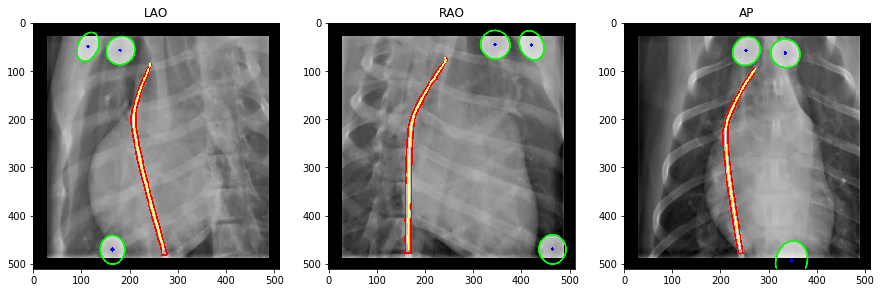

In [7]:
skel1[470:,:]=0   # Temporary removal of lower branches in skeletons
skel2[470:,:]=0
skel3[470:,:]=0

_, contours,hierarchy = cv2.findContours(skel1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img1_overlay, contours,  -1, (255,255,127), 2)
_, contours,hierarchy = cv2.findContours(skel2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2_overlay, contours,  -1, (255,255,127), 2)
_, contours,hierarchy = cv2.findContours(skel3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img3_overlay, contours,  -1, (255,255,127), 2)
plt.subplot(131),plt.imshow(img1_overlay,'gray'), plt.title('LAO')
plt.subplot(132),plt.imshow(img2_overlay,'gray'), plt.title('RAO')
plt.subplot(133),plt.imshow(img3_overlay,'gray'), plt.title('AP')
plt.show()

## Marker positions

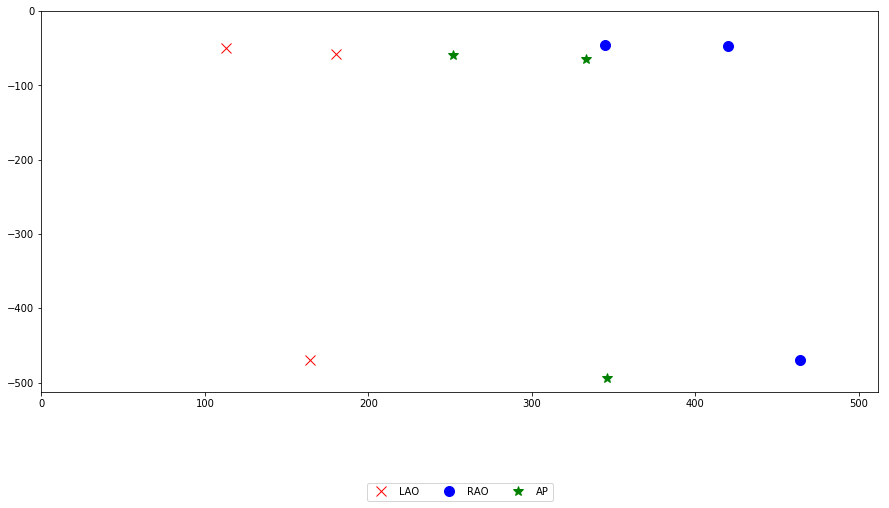

In [8]:

markerposAPcorr=markerposAP-markerposAP[0,:]
markerposLAOcorr=markerposLAO-markerposLAO[0,:]
markerposRAOcorr=markerposRAO-markerposRAO[0,:]
# markerposAPcorr1=np.column_stack((markerposAPcorr[:,1],markerposAPcorr[:,0]))
# markerposLAOcorr1=np.column_stack((markerposLAOcorr[:,1],markerposLAOcorr[:,0]))
# markerposRAOcorr1=np.column_stack((markerposRAOcorr[:,1],markerposRAOcorr[:,0]))
markerposAPcorr1=markerposAPcorr
markerposLAOcorr1=markerposLAOcorr
markerposRAOcorr1=markerposRAOcorr
plt.figure()
plt.plot(markerposLAO[:,0],-markerposLAO[:,1],'xr', markersize=10, label="LAO")
plt.plot(markerposRAO[:,0],-markerposRAO[:,1],'ob', markersize=10,label="RAO")
plt.plot(markerposAP[:,0],-markerposAP[:,1],'*g', markersize=10,label="AP")
plt.xlim(0,512)
plt.ylim(-512,0)
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.3), fancybox=True, ncol=3)
plt.show()


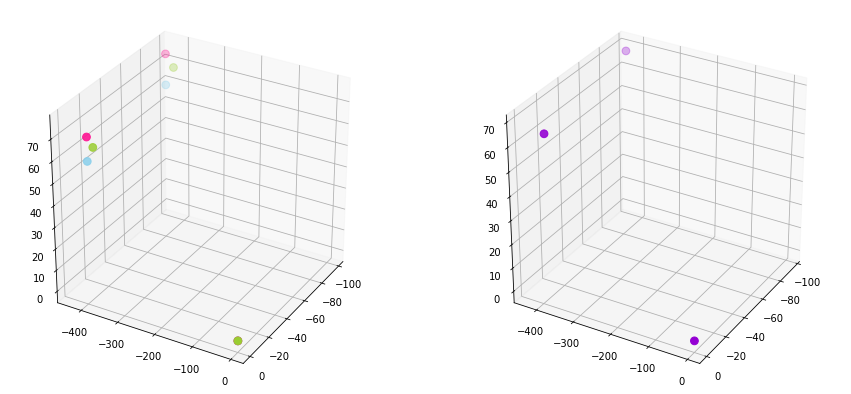

In [9]:

# Function for calculating Z position (referencing one of the marker)
import math
def calcZ(x1, x2, theta):
    thetaRad = theta / 180 * math.pi
    if(math.sin(thetaRad) is not 0):
        z2 = (x2*math.cos(thetaRad) - x1) / math.sin(thetaRad)
        z1 = x2*math.sin(thetaRad) + z2*math.cos(thetaRad)
    return [z1,z2] 

# AP-LAO comparison
[Z1,Z2] = calcZ(markerposAPcorr1[:,0], markerposLAOcorr1[:,0], 30)
Z1.astype(int)
Z2.astype(int)
mposAPLAOforAP=np.column_stack((markerposAPcorr1,Z1))
mposAPLAOforLAO=np.column_stack((markerposLAOcorr1,Z2))

# AP-RAO comparison
[Z1,Z2] = calcZ(markerposAPcorr1[:,0], markerposRAOcorr1[:,0], -30)
Z1.astype(int)
Z2.astype(int)
mposAPRAOforAP=np.column_stack((markerposAPcorr1,Z1))
mposAPRAOforRAO=np.column_stack((markerposRAOcorr1,Z2))

# RAO-LAO comparison
[Z1,Z2] = calcZ(markerposRAOcorr1[:,0], markerposLAOcorr1[:,0], 60)
Z1.astype(int)
Z2.astype(int)
mposRAOLAOforRAO=np.column_stack((markerposRAOcorr1,Z1))
mposRAOLAOforLAO=np.column_stack((markerposLAOcorr1,Z2))


thetaRad = 30 / 180 * math.pi
ZA1 = markerposLAOcorr1[:, 0]*math.sin(thetaRad) + Z2*math.cos(thetaRad)
XA1 = markerposLAOcorr1[:, 0]*math.cos(thetaRad) - Z2*math.sin(thetaRad)
ZA1.astype(int)
XA1.astype(int)

mposRAOLAOforAP=np.column_stack((XA1,markerposRAOcorr1[:,1],ZA1))

markers=np.vstack((mposAPLAOforAP,mposAPRAOforAP,mposRAOLAOforAP))

#K-means Clustering for marker positions

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(markers)
y_kmeans = kmeans.predict(markers)
centers = kmeans.cluster_centers_

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(mposAPLAOforAP[:,0],mposAPLAOforAP[:,1],mposAPLAOforAP[:,2], c='skyblue', s=60)
ax.scatter(mposAPRAOforAP[:,0],mposAPRAOforAP[:,1],mposAPRAOforAP[:,2], c='deeppink', s=60)
ax.scatter(mposRAOLAOforAP[:,0],mposRAOLAOforAP[:,1],mposRAOLAOforAP[:,2], c='yellowgreen', s=60)
ax.view_init(30, 30)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(centers[:,0],centers[:,1],centers[:,2], c='darkviolet', s=60)
ax.view_init(30, 30)
plt.show()

## Catheter positions (2D)

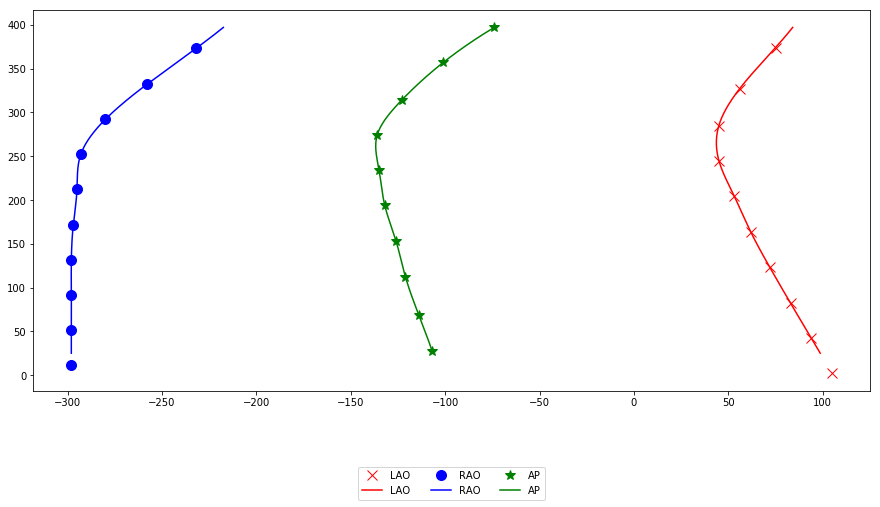

In [10]:
i1,j1= np.where(skel1 == 255)
skel1pos=np.transpose(np.array([i1, j1]))
i1min=min(i1)
i1max=max(i1)
i2,j2=np.where(skel2 ==255)
i2min=min(i2)
i2max=max(i2)
i3,j3=np.where(skel3 ==255)
i3min=min(i3)
i3max=max(i3)

imin=max(i1min,i2min,i3min)  # where catheter index should begin considering 3 views (row)
imax=min(i1max,i2max,i3max)  # where catheter index should end considering 3 views (row)

ci= 40 # cath position interval for cubic spline interpolation (every nth row)

data1={"row": i1, "column": j1}
df1=pd.DataFrame(data1)
df1=df1[df1['row']>imin-1]
df1=df1.drop_duplicates(subset='row', keep='first')
df1 = df1.values
# x = df1[:,0]
# y = df1[:,1]
rows = np.shape(df1)[0] #number of rows
columns = np.shape(df1)[1] #number of columns
l = range(rows)[0::ci] #indexes of each  element including the first element
new_matrix = np.ndarray(shape=(len(l),columns)) #Your new matrix
for i in range(len(l)):
    new_matrix[i] = df1[l[i]] #adding each third row from matrix to new_matrix
df1some = new_matrix

data2={"row": i2, "column": j2}
df2=pd.DataFrame(data2)
df2=df2[df2['row']>imin-1]
df2=df2.drop_duplicates(subset='row', keep='first')
df2 = df2.values
rows = np.shape(df2)[0] #number of rows
columns = np.shape(df2)[1] #number of columns
l = range(rows)[0::ci] #indexes of each  element including the first element
new_matrix = np.ndarray(shape=(len(l),columns)) #Your new matrix
for i in range(len(l)):
    new_matrix[i] = df2[l[i]] #adding each third row from matrix to new_matrix
df2some = new_matrix

data3={"row": i3, "column": j3}
df3=pd.DataFrame(data3)
df3=df3[df3['row']>imin-1]
df3=df3.drop_duplicates(subset='row', keep='first')
df3 = df3.values
rows = np.shape(df3)[0] #number of rows
columns = np.shape(df3)[1] #number of columns
l = range(rows)[0::ci] #indexes of each  element including the first element
new_matrix = np.ndarray(shape=(len(l),columns)) #Your new matrix
for i in range(len(l)):
    new_matrix[i] = df3[l[i]] #adding each third row from matrix to new_matrix
df3some = new_matrix

#%%
def swap_cols(arr, frm, to):
    arr[:,[frm, to]] = arr[:,[to, frm]]

# finding origin for substrating from catheter positions (need col swap)
markerposLAOsw=markerposLAO.copy()
markerposRAOsw=markerposRAO.copy()
markerposAPsw=markerposAP.copy()

swap_cols(markerposLAOsw, 0, 1)
swap_cols(markerposRAOsw, 0, 1)
swap_cols(markerposAPsw, 0, 1)

## Correcting to origin
df1somecorr = df1some -markerposLAOsw[0,:]
df2somecorr = df2some -markerposRAOsw[0,:]
df3somecorr = df3some -markerposAPsw[0,:]

## Interpolation
from scipy.interpolate import CubicSpline
xs1 = df1somecorr[:,0]
ys1 = df1somecorr[:,1]
xs2 = df2somecorr[:,0]
ys2 = df2somecorr[:,1]
xs3 = df3somecorr[:,0]
ys3 = df3somecorr[:,1]

xnew=np.arange(imin,imax)-markerposAPsw[0,0] # same for all 3 caths

cs1 = CubicSpline(xs1,ys1)
ynew1=cs1(xnew)
cs2 = CubicSpline(xs2,ys2)
ynew2=cs2(xnew)
cs3 = CubicSpline(xs3,ys3)
ynew3=cs3(xnew)

plt.figure() 
plt.plot(ys1,-xs1,'xr', ynew1, -xnew,'r',  markersize=10,label="LAO")
plt.plot(ys2,-xs2,'ob', ynew2, -xnew,'b',  markersize=10,label="RAO")
plt.plot(ys3,-xs3,'*g', ynew3, -xnew,'g', markersize=10, label="AP")
# plt.xlim(0,512)
# plt.ylim(0,512)
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.3), fancybox=True, ncol=3)
plt.show()



## Catheter positions (3D)

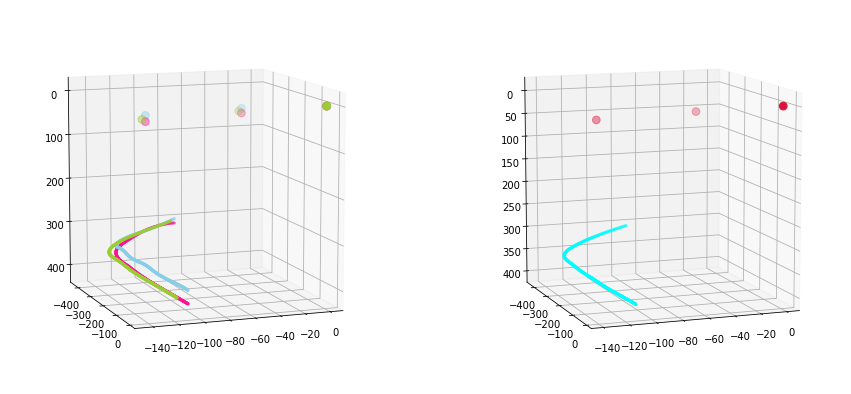

In [11]:
## Find Z positions for catheter

#AP-LAO
[Z1,Z2] = calcZ(ynew3, ynew1, 30)
Z1.astype(int)
Z2.astype(int)
cposAPLAOforAP=np.column_stack((ynew3, xnew, Z1))
cposAPLAOforLAO=np.column_stack((ynew1,xnew,Z2))
#AP-RAO
[Z1,Z2] = calcZ(ynew3, ynew2, -30)
Z1.astype(int)
Z2.astype(int)
cposAPRAOforAP=np.column_stack((ynew3, xnew, Z1))
cposAPRAOforRAO=np.column_stack((ynew2,xnew,Z2))

#RAO-LAO
[Z1,Z2] = calcZ(ynew2, ynew1, 60)
Z1.astype(int)
Z2.astype(int)
cposRAOLAOforRAO=np.column_stack((ynew2, xnew, Z1))
cposRAOLAOforLAO=np.column_stack((ynew1,xnew,Z2))

thetaRad = 30 / 180 * math.pi
ZA1 = ynew1*math.sin(thetaRad) + Z2*math.cos(thetaRad)
XA1 = ynew1*math.cos(thetaRad) - Z2*math.sin(thetaRad)

ZA1.astype(int)
XA1.astype(int)

cposRAOLAOforAP=np.column_stack((XA1,xnew,ZA1))

catheters=np.vstack((cposAPLAOforAP,cposAPRAOforAP,cposRAOLAOforAP))
meancposAP=(cposAPLAOforAP + cposAPRAOforAP + cposRAOLAOforAP)/3

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(cposAPLAOforAP[:,0],cposAPLAOforAP[:,1],cposAPLAOforAP[:,2], c='skyblue', s=5)
ax.scatter(cposAPRAOforAP[:,0],cposAPRAOforAP[:,1],cposAPRAOforAP[:,2], c='deeppink', s=5)
ax.scatter(cposRAOLAOforAP[:,0],cposRAOLAOforAP[:,1],cposRAOLAOforAP[:,2], c='yellowgreen', s=5)

ax.scatter(mposAPLAOforAP[:,0],mposAPLAOforAP[:,1],mposAPLAOforAP[:,2], c='skyblue', s=60)
ax.scatter(mposAPRAOforAP[:,0],mposAPRAOforAP[:,1],mposAPRAOforAP[:,2], c='deeppink', s=60)
ax.scatter(mposRAOLAOforAP[:,0],mposRAOLAOforAP[:,1],mposRAOLAOforAP[:,2], c='yellowgreen', s=60)
ax.view_init(-170, -70)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(meancposAP[:,0],meancposAP[:,1],meancposAP[:,2], c='cyan', s=5)
ax.scatter(centers[:,0],centers[:,1],centers[:,2], c='crimson', s=60)
ax.view_init(-170, -70)

plt.show()